In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Preparing the data

In [5]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
df['price']= housing.target

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
## Checking for missing value.
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [10]:
## Checking for corellaton. 
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'Price')

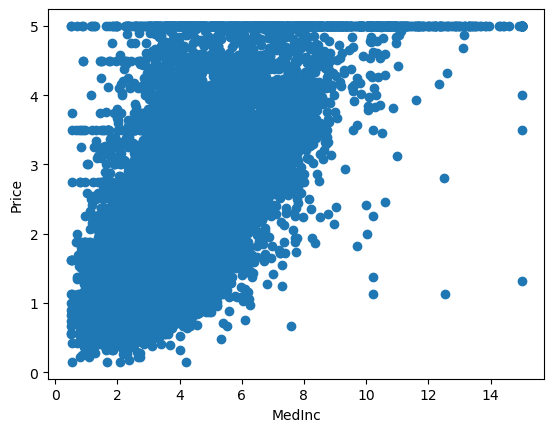

In [11]:
plt.scatter(df['MedInc'],df['price'])
plt.xlabel("MedInc")
plt.ylabel('Price')

In [12]:
X = df.drop('price',axis=1)
y = df.price

In [13]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [15]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14827,1.6389,37.0,3.733333,1.000000,1086.0,3.290909,32.66,-117.09
12640,2.1679,34.0,4.792405,1.050633,884.0,2.237975,38.53,-121.45
6016,2.4464,33.0,3.520000,0.906667,964.0,3.213333,34.06,-117.78
13650,1.9926,37.0,4.143478,1.004348,611.0,2.656522,34.08,-117.31
13275,2.6582,15.0,4.540208,1.143803,2554.0,2.416272,34.10,-117.63
...,...,...,...,...,...,...,...,...
11532,1.7675,26.0,3.847093,1.082556,1829.0,1.312994,33.77,-118.09
16065,4.4375,49.0,5.439506,1.004938,1052.0,2.597531,37.75,-122.48
14501,3.0450,16.0,2.708804,1.056433,648.0,1.462754,32.86,-117.23
14555,6.7120,15.0,7.844291,1.010381,1180.0,4.083045,32.96,-117.13


In [16]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

## Model training

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [21]:
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
## print the coefficients and intercept 
print(regression.coef_)

[ 0.81418538  0.11421899 -0.24778507  0.29236317 -0.00489909 -0.02754016
 -0.92119308 -0.88652618]


In [23]:
print(regression.intercept_)

2.0590860700442932


 ### Coefficients and Intercept 
 Exam Score = 50 + 4 * Study Hours

Here's how the coefficients and intercept play out in this example:

* Coefficient (4): This means for every one hour increase in study time, the average exam score goes up by 4 points.
* Intercept (50): This represents the predicted exam score if someone studied for zero hours. In this case, it's 50. (It's important to remember that studying for zero hours wouldn't be realistic, so the intercept might not be a very meaningful score in this case).

So, the equation essentially tells you:

* The starting point for exam scores is 50 (intercept).
* With each extra hour of studying, scores tend to go up by 4 points (coefficient).

In [24]:
## Predict with test data
reg_pred = regression.predict(X_test)
reg_pred

array([2.00526434, 2.57916713, 1.18677306, ..., 1.67144018, 2.43598237,
       1.59890132])

## Assumptions

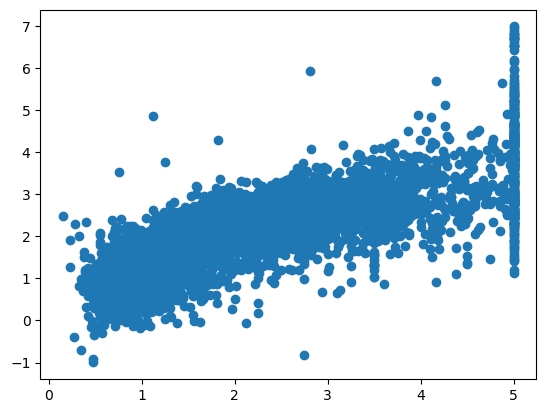

In [25]:
## plot a scatter plot. If there is linearity then it's a preaty good plot
plt.scatter(y_test,reg_pred)

In [26]:
## Residuals
residuals=y_test-reg_pred
residuals

6607     0.259736
884     -0.617167
9457     0.271227
18681    2.510935
4654     0.390500
           ...   
3606    -0.099462
11607   -0.394069
12610   -0.023440
8561     0.961018
203     -0.404901
Name: price, Length: 6192, dtype: float64

### Residuals
* They can be positive or negative. A positive residual means the observed value was higher than predicted, and a negative residual means the observed value was lower than predicted.
* By analyzing the residuals, you can assess the goodness-of-fit of a model and identify potential problems with the model.

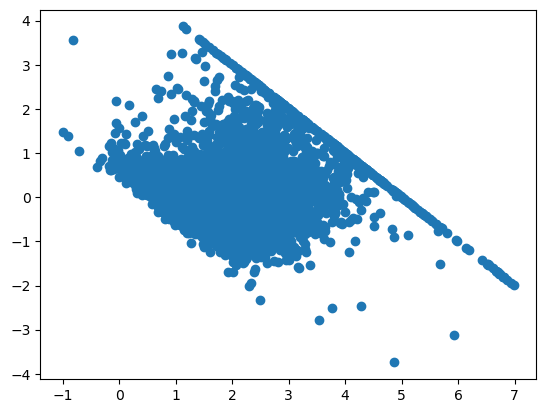

In [27]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5424799334532414
0.5475241882233958
0.7399487740535798


1. Mean Absolute Error (MAE):

* MAE calculates the average of the absolute differences between predicted and actual values. In simpler terms, it adds up the distance (without considering direction) between each predicted value and its corresponding actual value, and then divides by the number of data points.
* MAE is less sensitive to outliers (extreme values) compared to MSE and RMSE. An outlier with a large difference from the prediction will only contribute its absolute value to the sum, not a squared value that can significantly inflate the error.
* MAE is easier to interpret because it's in the same units as your data. For example, if you're predicting house prices, MAE would be in dollars.

2. Mean Squared Error (MSE):

* MSE squares the differences between predicted and actual values, then takes the average. So, larger errors are punished more heavily than smaller ones.
* MSE is more sensitive to outliers than MAE. A single data point with a large difference from the prediction will significantly inflate the MSE because it's squared before averaging.
* MSE is not directly interpretable in the units of your data because it's squared.

3. Root Mean Squared Error (RMSE):

* RMSE is simply the square root of the MSE. It takes the MSE and undoes the squaring done in step 2, bringing the units back to the scale of your data.
* RMSE is easier to interpret than MSE because it's in the same units as your data, but it's still more sensitive to outliers than MAE.

Choosing the Right Metric:

* There's no single "best" metric among these three. The best choice depends on your specific situation and what aspects of the errors you care about:

* Use MAE if you're concerned about the impact of outliers and want an interpretable measure in your data units.
* Use MSE or RMSE if you want to penalize larger errors more heavily, but be aware of the influence of outliers, especially for RMSE.

### R square and adjusted R square
Formula

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [29]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5944602625172049


In [30]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5939355466996628

**R-squared and adjusted R-squared** are both statistics used in regression analysis to assess how well a model fits the data. However, they have some key differences:

R-squared:

* Represents the proportion of variance in the dependent variable (what you're trying to predict) that is explained by the independent variables (what you think influences the dependent variable).
* Ranges from 0 to 1 (0% to 100%).
* A higher R-squared generally indicates a better fit, but there are limitations:
  * Simple vs. Multiple Regression: R-squared will always increase (or stay the same) as you add more independent variables to your model, even if those variables aren't statistically significant. This can be misleading in multiple regression (models with more than one independent variable).
  * Overfitting: A very high R-squared might not always be good. It could indicate overfitting, where the model fits the training data too closely but might not perform well on unseen data.

Adjusted R-squared:

* A modified version of R-squared that addresses the limitations mentioned above.
* Takes into account the number of independent variables in the model.
* Penalizes the addition of unnecessary variables that don't significantly improve the model's fit.
* Ranges from -1 to 1 (although negative values are rare in practice).
* A higher adjusted R-squared generally indicates a better fit, considering both the explained variance and the model's complexity.

Here's an analogy to understand the difference:

* Imagine you have a bunch of clothes you want to fit into a box. R-squared is like simply cramming all the clothes in, regardless of how neatly they fit. Adjusted R-squared is like carefully folding the clothes to maximize space – it considers both how much space is filled and how efficiently you've used it.

When to use which:

* For simple linear regression (one independent variable), both R-squared and adjusted R-squared are generally fine.
* For multiple regression, adjusted R-squared is preferred because it penalizes overfitting and gives a more reliable indication of the model's generalizability.

In essence:

* R-squared: A basic measure of explained variance, but can be misleading in multiple regression.
* Adjusted R-squared: A more reliable measure that considers both explained variance and model complexity, especially for multiple regression.

## New Data Prediction

In [31]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [32]:
##transformation of new data
scaler.transform(housing.data[0].reshape(1,-1))

/Users/shachindebnath/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.35470094,  0.99523793,  0.59013941, -0.1456185 , -0.96096195,
        -0.07101791,  1.04738654, -1.32562573]])

In [33]:
regression.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/Users/shachindebnath/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.11814336])

### Pickling The Model file For Deployment

In [34]:
import pickle

In [35]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [36]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [37]:
## Prediction
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/Users/shachindebnath/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.11814336])